# Correletion Analysis

In [1]:
#Import the necessary libraries:
import hylite
from hylite import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cross_decomposition import PLSRegression

In [3]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

In [4]:
from sklearn.metrics import r2_score, mean_squared_error 

In [5]:
%matplotlib inline

The first part of the correlation analysis involved comparing the absorption wavelengths of calcite across the four sensors.

In [6]:
# Load Datasets
Hymap = io.load( '/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/hymap_final_sub.hdr' )
Enmap = io.load( '/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/enmap_final_sub.hdr' )
Prisma=io.load('/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/prisma_final_sub.hdr')
EMIT=io.load('/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/emit_final_sub.hdr')

In [7]:
#Data normalisation
Enmap.data = Enmap.data.astype(np.float32) / np.nanmax(Enmap.data)
Hymap.data = Hymap.data.astype(np.float32) / np.nanmax(Hymap.data)
Prisma.data = Prisma.data.astype(np.float32) / np.nanmax(Prisma.data)

In [8]:
#deleting NaN bands
Enmap.data[ Enmap.data <= 0. ] = np.nan
Enmap.delete_nan_bands
Enmap.data = Enmap.data.astype(np.float32)
Enmap.fill_holes()

Hymap.data[ Hymap.data <= 0. ] = np.nan
Hymap.delete_nan_bands
Hymap.data = Hymap.data.astype(np.float32)
Hymap.fill_holes()

Prisma.data[ Prisma.data <= 0. ] = np.nan
Prisma.delete_nan_bands
Prisma.data = Prisma.data.astype(np.float32)
Prisma.fill_holes()

EMIT.data[ EMIT.data <= 0. ] = np.nan
EMIT.delete_nan_bands
EMIT.data = EMIT.data.astype(np.float32)
EMIT.fill_holes()

To ensure uniformity in the datasets before proceeding with the correlation analysis, spatial resampling may be necessary.

In [9]:
Prisma.data.shape

(552, 206, 230)

In [10]:
Enmap.data.shape

(552, 206, 217)

In [11]:
# Selecting the specific band wich represents the absorption wavelengths of calcite 
x=Enmap.data[:,:,204].flatten()[:,None]
y=Prisma.data[:,:,212].flatten()[:,None]
print(x.shape)
print(y.shape)

(113712, 1)
(113712, 1)


In [12]:
model = LinearRegression()
#Fit the model to your data
model.fit(x, y)

LinearRegression()

In [13]:
a = model.coef_
b = model.intercept_

In [14]:
# Predict y values using the fitted linear equation
predicted_y_values = model.predict(x)

# Calculate the coefficient of determination (R^2 score)
r2 = r2_score(y, predicted_y_values)
#std
mse=mean_squared_error(y,predicted_y_values)
rmse = np.sqrt(mean_squared_error(y, predicted_y_values))
# Print the results
print("Fitted Equation: y =", a, "x +", b)
print("R^2 Score:", r2)
print('MSE:',mse)
print('Root mean squared error: ', rmse)

Fitted Equation: y = [[0.3126102]] x + [0.06358322]
R^2 Score: 0.7350596614087048
MSE: 0.00017862863
Root mean squared error:  0.013365203


Text(0, 0.5, 'EnMAP')

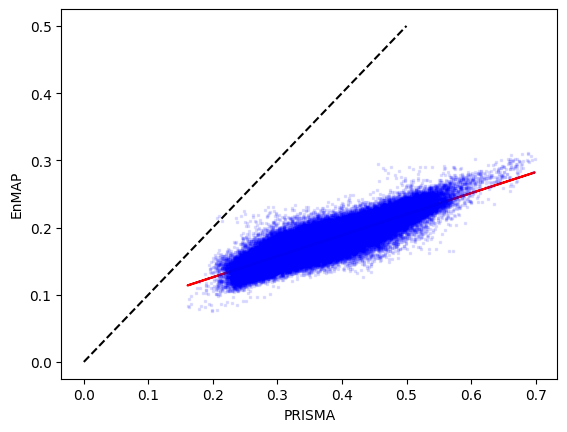

In [15]:
plt.scatter(x,y, s=1, c='blue',marker=',', alpha=0.1)
plt.plot([0,0.5],[0,0.5],color='k', ls='--', zorder=0)
plt.plot(x, a*x+b, color='r', zorder=0)
plt.xlabel('PRISMA')
plt.ylabel('EnMAP') 

In the second part, we correlated the results of the band ratio analysis and then the results of the spectral abundance analysis among the four sensors. We followed the same process, comparing the calcite abundance derived from each sensor